In [2]:
import numpy as np

import torch
from torch import nn
from torch import optim

# Activation & Loss Functions

Between layers of a Neural Network, we pass values derived from the previous layer. We call this set of values the Activations of the layer. Before we pass the values, we would apply some form of Activation Function to introduce non-linearity to the Network.

I will be consolidating all types of Activation Functions I know of in this notebook.
List of Activation Functions:
1. Sigmoid
    - 1 / (1+e^-x)
    - 0 to 1
2. Tanh - -1 to 1 
    - (e^z - e^-z) / (e^z + e ^-z)
    - -1 to 1
3. ReLU
    - a = max(0, z)
4. Leaky ReLU
    - a = max(0.01z, z)
5. Softmax

In [3]:
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

## Sigmoid

In [4]:
x, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                           flip_y=0.1,
                           class_sep=0.9
                          )

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

In [5]:
# values of x
print(x.min())
print(x.max())

tensor(-4.1257)
tensor(2.7238)


In [6]:
x_sig = torch.sigmoid(x)
print(x_sig.min())
print(x_sig.max())

tensor(0.0159)
tensor(0.9384)


Observe that the sigmoid functions converts the values between 0 to 1.

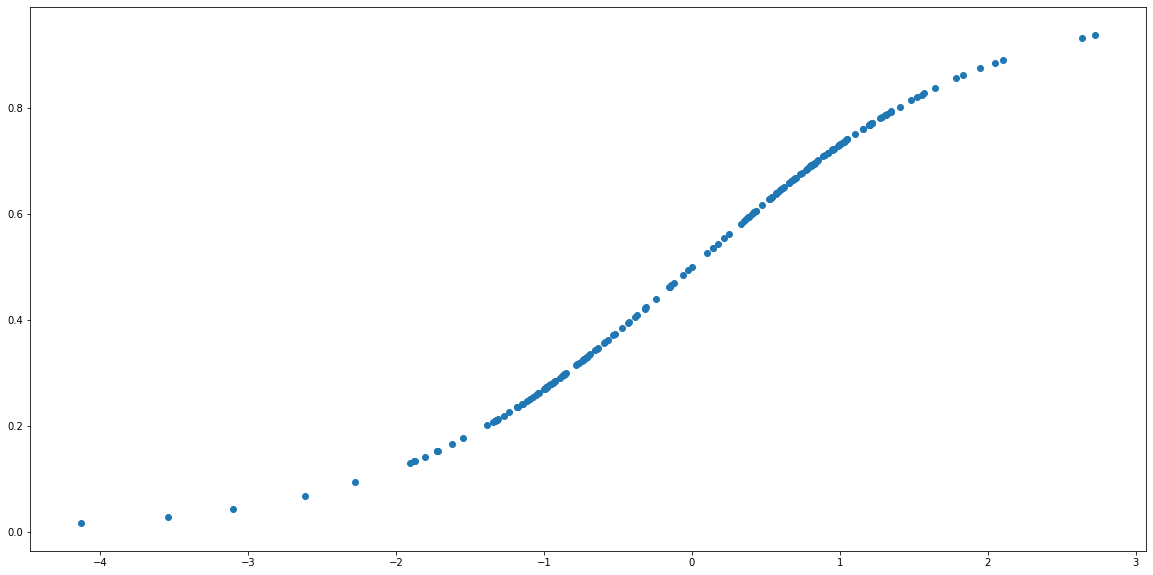

In [7]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_sig.view(200))

## Tanh

In [8]:
x_tanh = torch.tanh(x)
print(x_tanh.min())
print(x_tanh.max())

tensor(-0.9995)
tensor(0.9914)


The Tanh function has a slight deviation than Sigmoid where it restricts the bottom to -1 instead of 0 giving it a range from -1 to 1.

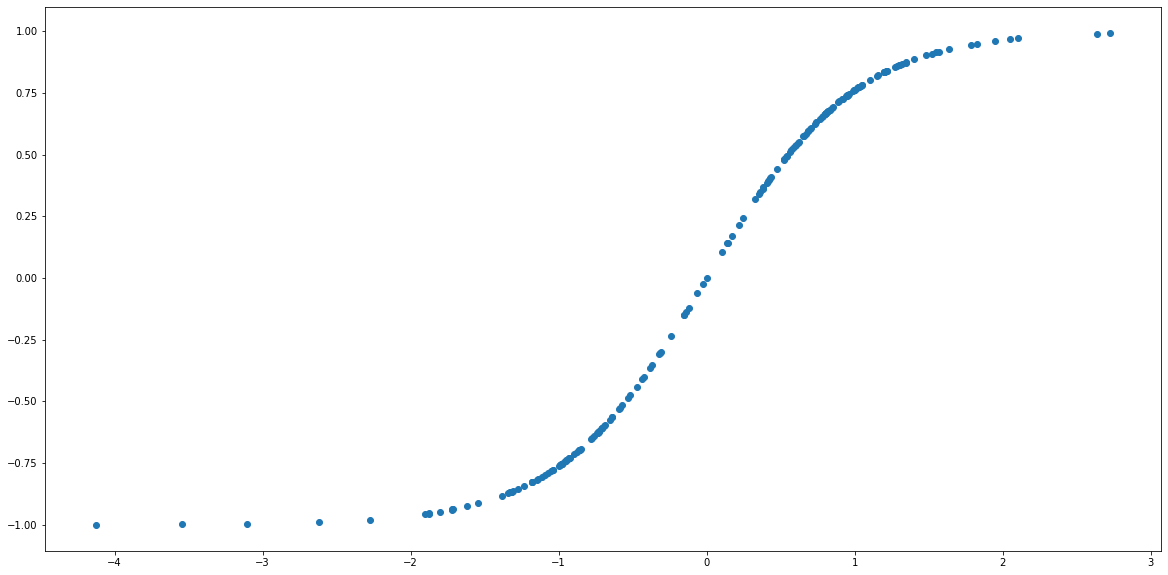

In [9]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_tanh.view(200))

## Sigmoid vs. Tanh

Training a simple Sigmoid Network

In [10]:
# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

In [11]:
# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))

1/1000 --- Loss: 0.7579440474510193
11/1000 --- Loss: 0.7447681427001953
21/1000 --- Loss: 0.7315318584442139
31/1000 --- Loss: 0.7182895541191101
41/1000 --- Loss: 0.7051072120666504
51/1000 --- Loss: 0.6920580267906189
61/1000 --- Loss: 0.6792228817939758
71/1000 --- Loss: 0.6666867733001709
81/1000 --- Loss: 0.6545352935791016
91/1000 --- Loss: 0.6428482532501221
101/1000 --- Loss: 0.6316964626312256
111/1000 --- Loss: 0.6211338639259338
121/1000 --- Loss: 0.6111974120140076
131/1000 --- Loss: 0.601904034614563
141/1000 --- Loss: 0.5932524800300598
151/1000 --- Loss: 0.585226833820343
161/1000 --- Loss: 0.5777997374534607
171/1000 --- Loss: 0.570936381816864
181/1000 --- Loss: 0.5645981431007385
191/1000 --- Loss: 0.5587437748908997
201/1000 --- Loss: 0.5533326864242554
211/1000 --- Loss: 0.5483256578445435
221/1000 --- Loss: 0.5436857342720032
231/1000 --- Loss: 0.5393789410591125
241/1000 --- Loss: 0.5353734493255615
251/1000 --- Loss: 0.5316414833068848
261/1000 --- Loss: 0.52815

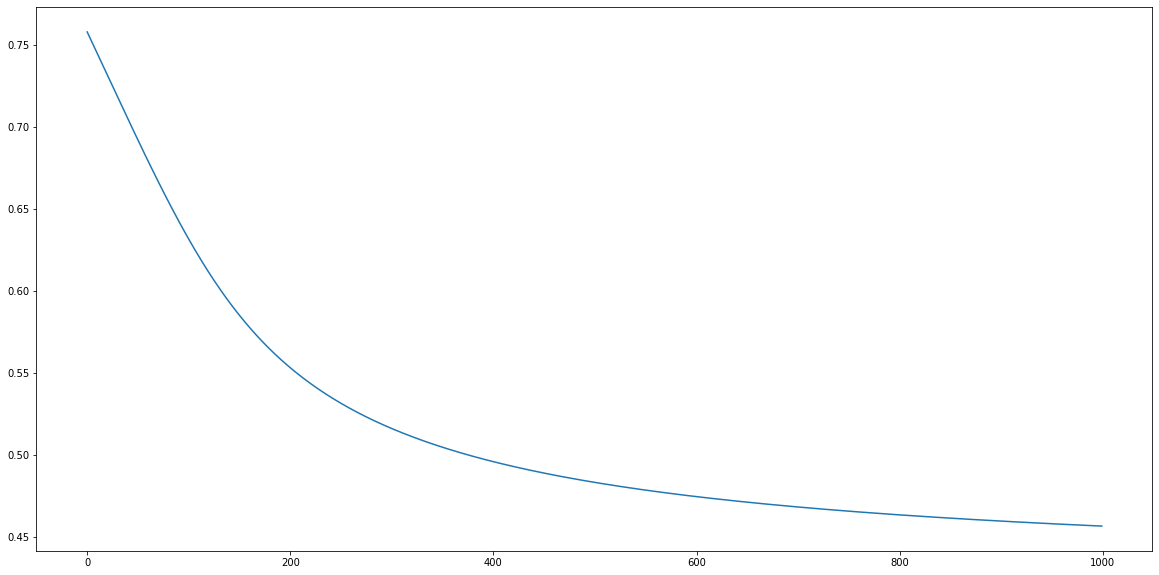

In [12]:
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Training a simple Tanh Network

In [13]:
# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

In [14]:
# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))

1/1000 --- Loss: 0.7735394239425659
11/1000 --- Loss: 0.6007934808731079
21/1000 --- Loss: 0.512336254119873
31/1000 --- Loss: 0.46508124470710754
41/1000 --- Loss: 0.43505534529685974
51/1000 --- Loss: 0.41440460085868835
61/1000 --- Loss: 0.3997775912284851
71/1000 --- Loss: 0.3891705274581909
81/1000 --- Loss: 0.3812592327594757
91/1000 --- Loss: 0.37518253922462463
101/1000 --- Loss: 0.3703859746456146
111/1000 --- Loss: 0.36650893092155457
121/1000 --- Loss: 0.3633112609386444
131/1000 --- Loss: 0.3606281280517578
141/1000 --- Loss: 0.35834357142448425
151/1000 --- Loss: 0.35637351870536804
161/1000 --- Loss: 0.3546558618545532
171/1000 --- Loss: 0.3531440496444702
181/1000 --- Loss: 0.35180187225341797
191/1000 --- Loss: 0.350601464509964
201/1000 --- Loss: 0.34952032566070557
211/1000 --- Loss: 0.3485409617424011
221/1000 --- Loss: 0.3476487994194031
231/1000 --- Loss: 0.3468320965766907
241/1000 --- Loss: 0.3460809588432312
251/1000 --- Loss: 0.345387727022171
261/1000 --- Loss

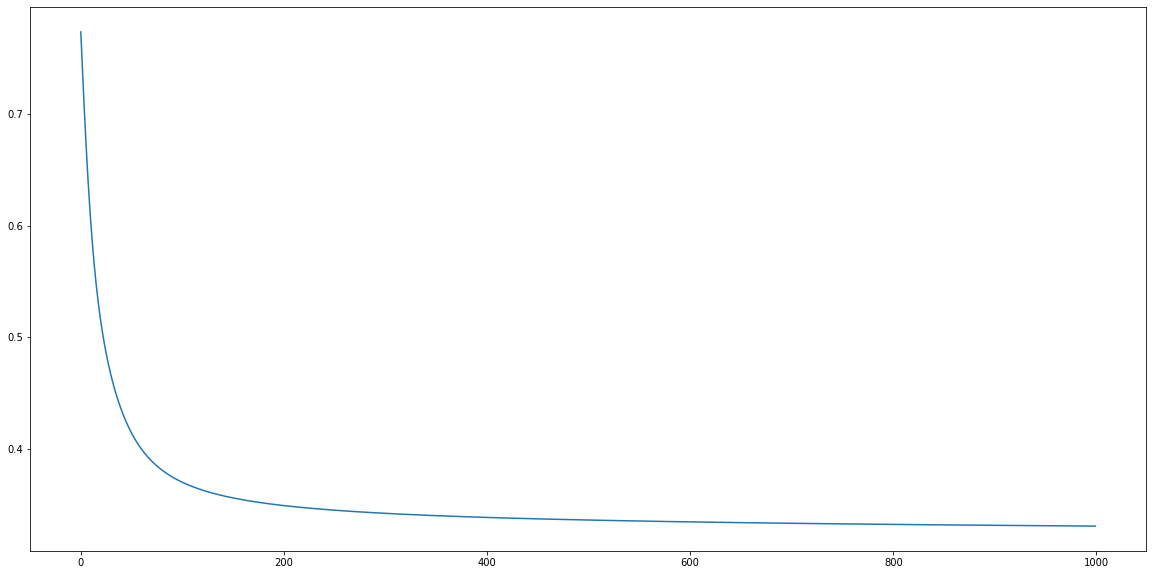

In [15]:
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Based on the loss graphs of the Sigmoid and Tanh, we can observe that overall, the Tanh Network learned much quicker and converges to a lower loss value overall. This is largely attributed to the Tanh function being centered around 0 which makes learning much smoother.

## Vanishing Gradient

If we observe both the Sigmoid and Tanh charts earlier, we can see that the gradients of both functions becomes gentler as the value of x approaches higher magnitudes. This often causes what is known as vanishing gradients. This means that the gradients of values with high magnitudes tends towards 0, making it extremely difficult or impossible to learn.

We observe the sigmoid function first

1/1000 --- Loss: 0.6591838002204895
11/1000 --- Loss: 0.5390409231185913
21/1000 --- Loss: 0.5285073518753052
31/1000 --- Loss: 0.5273138284683228
41/1000 --- Loss: 0.525028645992279
51/1000 --- Loss: 0.5264596343040466
61/1000 --- Loss: 0.5249743461608887
71/1000 --- Loss: 0.5257824063301086
81/1000 --- Loss: 0.5250039100646973
91/1000 --- Loss: 0.525185763835907
101/1000 --- Loss: 0.5249196887016296
111/1000 --- Loss: 0.5248067378997803
121/1000 --- Loss: 0.5246728658676147
131/1000 --- Loss: 0.5245487689971924
141/1000 --- Loss: 0.5244299173355103
151/1000 --- Loss: 0.524315595626831
161/1000 --- Loss: 0.5242047309875488
171/1000 --- Loss: 0.5240967869758606
181/1000 --- Loss: 0.5239908695220947
191/1000 --- Loss: 0.5238866209983826
201/1000 --- Loss: 0.5237832069396973
211/1000 --- Loss: 0.5236804485321045
221/1000 --- Loss: 0.5235780477523804
231/1000 --- Loss: 0.5234761834144592
241/1000 --- Loss: 0.5233756899833679
251/1000 --- Loss: 0.5232784152030945
261/1000 --- Loss: 0.52318

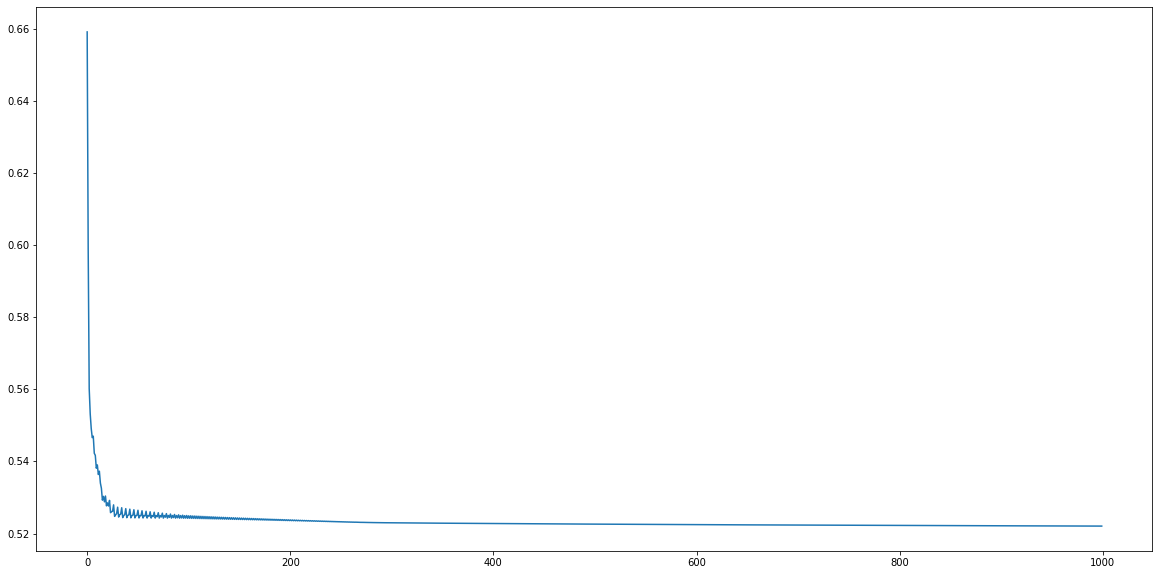

In [16]:
# multiply by 100
temp_x = x * 100

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.5658583641052246
11/1000 --- Loss: 0.5649917721748352
21/1000 --- Loss: 0.5649917721748352
31/1000 --- Loss: 0.5649917721748352
41/1000 --- Loss: 0.5649917721748352
51/1000 --- Loss: 0.5649917721748352
61/1000 --- Loss: 0.5649917721748352
71/1000 --- Loss: 0.5649917721748352
81/1000 --- Loss: 0.5649917721748352
91/1000 --- Loss: 0.5649917721748352
101/1000 --- Loss: 0.5649917721748352
111/1000 --- Loss: 0.5649917721748352
121/1000 --- Loss: 0.5649917721748352
131/1000 --- Loss: 0.5649917721748352
141/1000 --- Loss: 0.5649917721748352
151/1000 --- Loss: 0.5649917721748352
161/1000 --- Loss: 0.5649917721748352
171/1000 --- Loss: 0.5649917721748352
181/1000 --- Loss: 0.5649917721748352
191/1000 --- Loss: 0.5649917721748352
201/1000 --- Loss: 0.5649917721748352
211/1000 --- Loss: 0.5649917721748352
221/1000 --- Loss: 0.5649917721748352
231/1000 --- Loss: 0.5649917721748352
241/1000 --- Loss: 0.5649917721748352
251/1000 --- Loss: 0.5649917721748352
261/1000 --- Loss: 0.56

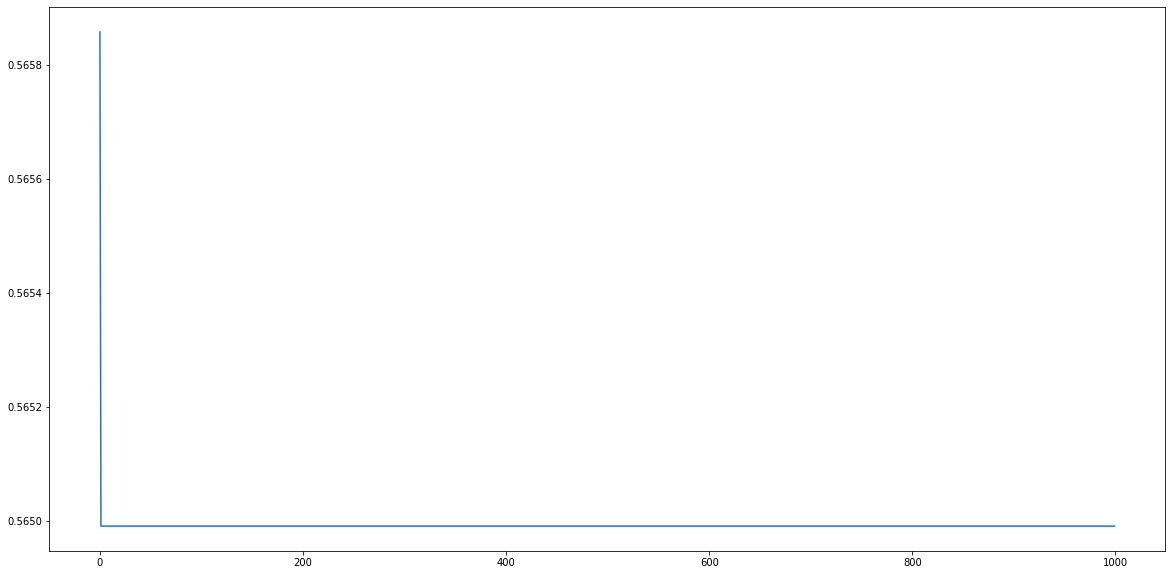

In [17]:
# multiply by 1,000
temp_x = x * 1000

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.7552158236503601
11/1000 --- Loss: 0.7552158236503601
21/1000 --- Loss: 0.7552158236503601
31/1000 --- Loss: 0.7552158236503601
41/1000 --- Loss: 0.7552158236503601
51/1000 --- Loss: 0.7552158236503601
61/1000 --- Loss: 0.7552158236503601
71/1000 --- Loss: 0.7552158236503601
81/1000 --- Loss: 0.7552158236503601
91/1000 --- Loss: 0.7552158236503601
101/1000 --- Loss: 0.7552158236503601
111/1000 --- Loss: 0.7552158236503601
121/1000 --- Loss: 0.7552158236503601
131/1000 --- Loss: 0.7552158236503601
141/1000 --- Loss: 0.7552158236503601
151/1000 --- Loss: 0.7552158236503601
161/1000 --- Loss: 0.7552158236503601
171/1000 --- Loss: 0.7552158236503601
181/1000 --- Loss: 0.7552158236503601
191/1000 --- Loss: 0.7552158236503601
201/1000 --- Loss: 0.7552158236503601
211/1000 --- Loss: 0.7552158236503601
221/1000 --- Loss: 0.7552158236503601
231/1000 --- Loss: 0.7552158236503601
241/1000 --- Loss: 0.7552158236503601
251/1000 --- Loss: 0.7552158236503601
261/1000 --- Loss: 0.75

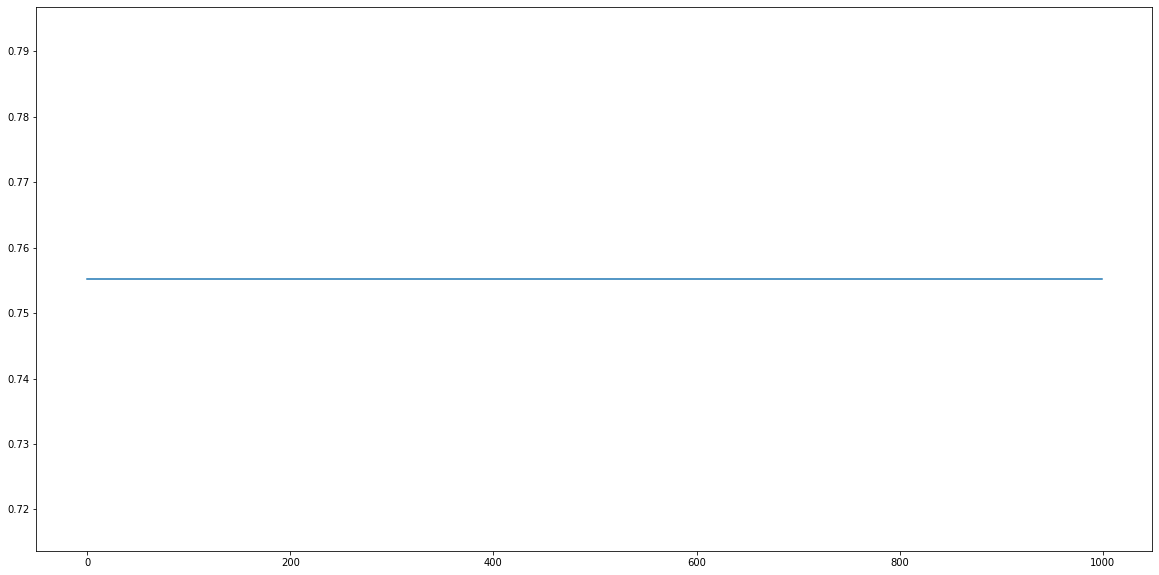

In [18]:
# multiply by 10,000
temp_x = x * 10000

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

We observe that learning becomes less and less smooth and eventually, impossible as the values of x increases.

1/1000 --- Loss: 1.1771254539489746
11/1000 --- Loss: 0.6875182390213013
21/1000 --- Loss: 0.6875025033950806
31/1000 --- Loss: 0.687498927116394
41/1000 --- Loss: 0.6874975562095642
51/1000 --- Loss: 0.6874969005584717
61/1000 --- Loss: 0.687496542930603
71/1000 --- Loss: 0.6874964237213135
81/1000 --- Loss: 0.6874964237213135
91/1000 --- Loss: 0.6874963641166687
101/1000 --- Loss: 0.6874963641166687
111/1000 --- Loss: 0.6874963641166687
121/1000 --- Loss: 0.6874962449073792
131/1000 --- Loss: 0.6874962449073792
141/1000 --- Loss: 0.6874961853027344
151/1000 --- Loss: 0.6874961853027344
161/1000 --- Loss: 0.6874961853027344
171/1000 --- Loss: 0.6874961853027344
181/1000 --- Loss: 0.6874961853027344
191/1000 --- Loss: 0.6874961853027344
201/1000 --- Loss: 0.6874961256980896
211/1000 --- Loss: 0.6874961256980896
221/1000 --- Loss: 0.6874961256980896
231/1000 --- Loss: 0.6874961256980896
241/1000 --- Loss: 0.6874961256980896
251/1000 --- Loss: 0.6874960064888
261/1000 --- Loss: 0.6874960

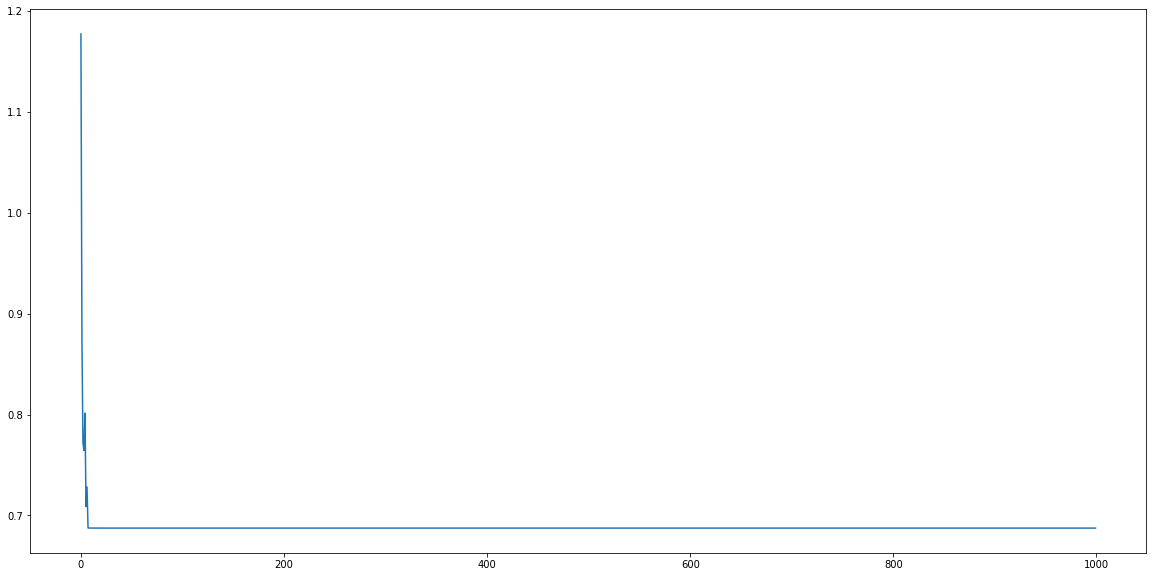

In [19]:
# multiply by 100
temp_x = x * 100

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 1.0406320095062256
11/1000 --- Loss: 1.0406320095062256
21/1000 --- Loss: 1.0406320095062256
31/1000 --- Loss: 1.0406320095062256
41/1000 --- Loss: 1.0406320095062256
51/1000 --- Loss: 1.0406320095062256
61/1000 --- Loss: 1.0406320095062256
71/1000 --- Loss: 1.0406320095062256
81/1000 --- Loss: 1.0406320095062256
91/1000 --- Loss: 1.0406320095062256
101/1000 --- Loss: 1.0406320095062256
111/1000 --- Loss: 1.0406320095062256
121/1000 --- Loss: 1.0406320095062256
131/1000 --- Loss: 1.0406320095062256
141/1000 --- Loss: 1.0406320095062256
151/1000 --- Loss: 1.0406320095062256
161/1000 --- Loss: 1.0406320095062256
171/1000 --- Loss: 1.0406320095062256
181/1000 --- Loss: 1.0406320095062256
191/1000 --- Loss: 1.0406320095062256
201/1000 --- Loss: 1.0406320095062256
211/1000 --- Loss: 1.0406320095062256
221/1000 --- Loss: 1.0406320095062256
231/1000 --- Loss: 1.0406320095062256
241/1000 --- Loss: 1.0406320095062256
251/1000 --- Loss: 1.0406320095062256
261/1000 --- Loss: 1.04

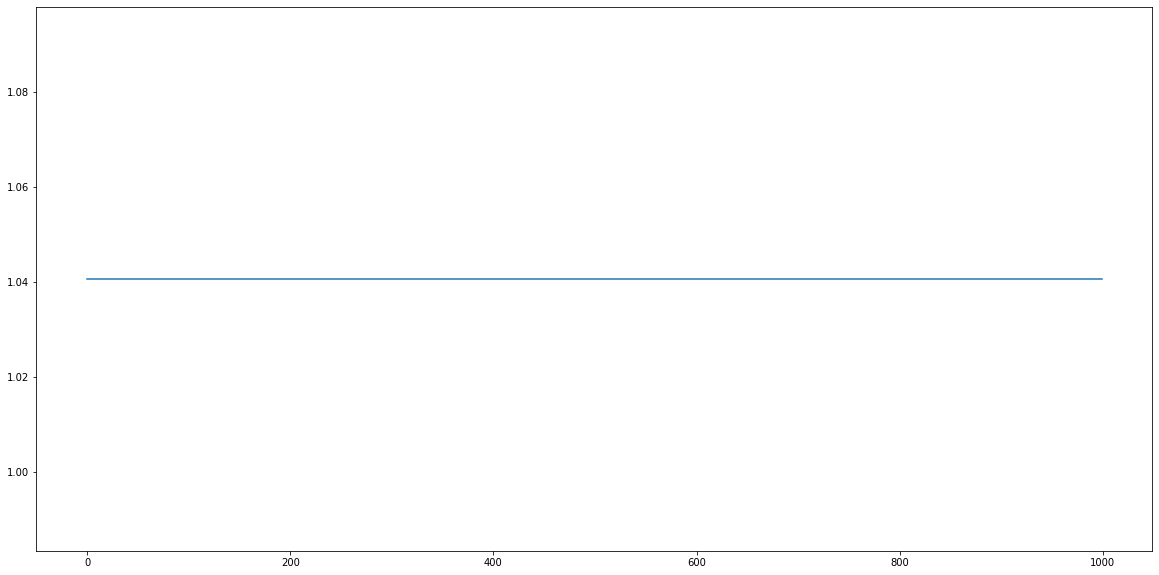

In [20]:
# multiply by 1,000
temp_x = x * 1000

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.6032808423042297
11/1000 --- Loss: 0.6032808423042297
21/1000 --- Loss: 0.6032808423042297
31/1000 --- Loss: 0.6032808423042297
41/1000 --- Loss: 0.6032808423042297
51/1000 --- Loss: 0.6032808423042297
61/1000 --- Loss: 0.6032808423042297
71/1000 --- Loss: 0.6032808423042297
81/1000 --- Loss: 0.6032808423042297
91/1000 --- Loss: 0.6032808423042297
101/1000 --- Loss: 0.6032808423042297
111/1000 --- Loss: 0.6032808423042297
121/1000 --- Loss: 0.6032808423042297
131/1000 --- Loss: 0.6032808423042297
141/1000 --- Loss: 0.6032808423042297
151/1000 --- Loss: 0.6032808423042297
161/1000 --- Loss: 0.6032808423042297
171/1000 --- Loss: 0.6032808423042297
181/1000 --- Loss: 0.6032808423042297
191/1000 --- Loss: 0.6032808423042297
201/1000 --- Loss: 0.6032808423042297
211/1000 --- Loss: 0.6032808423042297
221/1000 --- Loss: 0.6032808423042297
231/1000 --- Loss: 0.6032808423042297
241/1000 --- Loss: 0.6032808423042297
251/1000 --- Loss: 0.6032808423042297
261/1000 --- Loss: 0.60

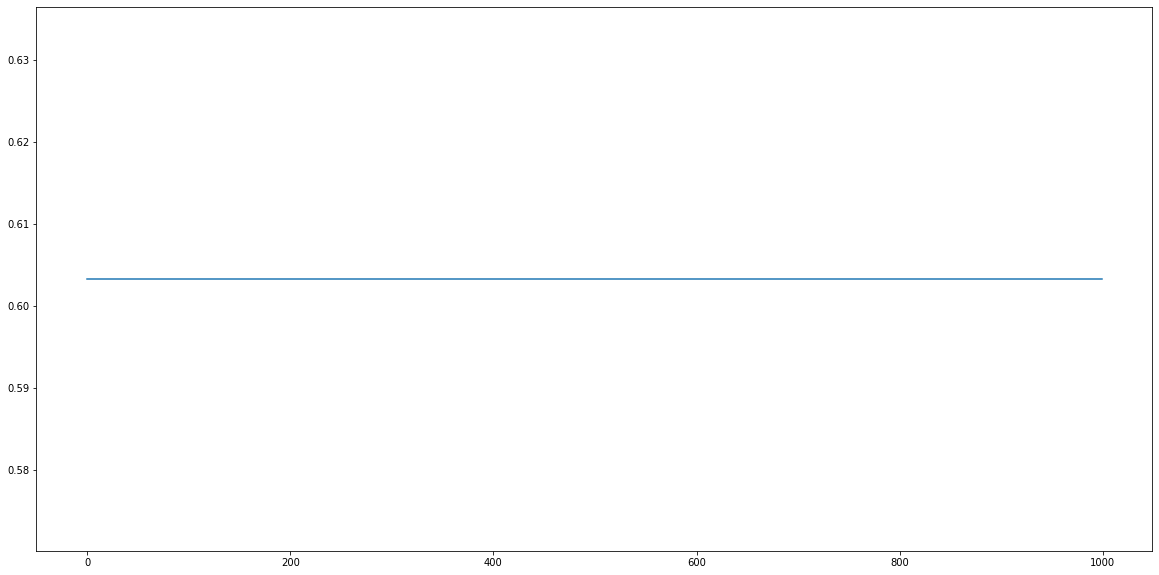

In [21]:
# multiply by 10,000
temp_x = x * 10000

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Similarly for the Tanh function, we observe the same problem.

## ReLU

In [22]:
x_relu = torch.relu(x)

In [23]:
print(x.min())
print(x.max())

tensor(-4.1257)
tensor(2.7238)


In [24]:
print(x_relu.min())
print(x_relu.max())

tensor(0.)
tensor(2.7238)


Notice how the maximum value of the values after relu is equal to those before and the minimum is 0. This is because ReLU fundamentally returns the same values for all positive values and 0 for negative values.

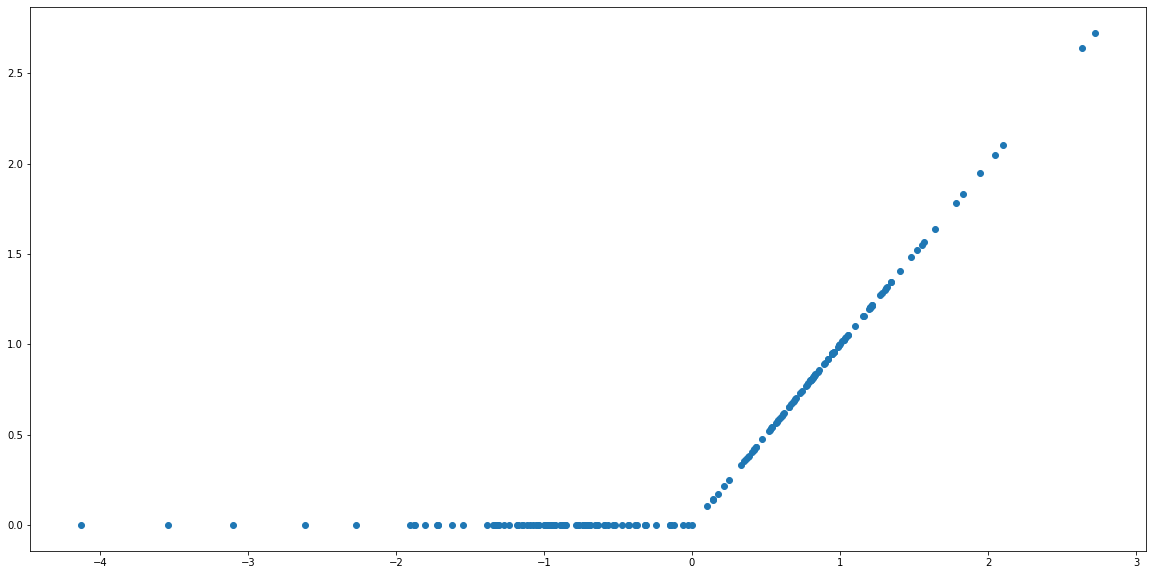

In [25]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_relu.view(200))

The main breakthrough of ReLU is that it does not face the same vanishing gradient problem as Tanh and Sigmoid. Unlike them, ReLU has a constant gradient of 1 regardless of the x values. Its only limitation would be its 0 gradient for negative values.

### Dying ReLU

1/1000 --- Loss: 1.4207866191864014
11/1000 --- Loss: 0.6931465864181519
21/1000 --- Loss: 0.6931465864181519
31/1000 --- Loss: 0.6931465864181519
41/1000 --- Loss: 0.6931465864181519
51/1000 --- Loss: 0.6931465864181519
61/1000 --- Loss: 0.6931465864181519
71/1000 --- Loss: 0.6931465864181519
81/1000 --- Loss: 0.6931465864181519
91/1000 --- Loss: 0.6931465864181519
101/1000 --- Loss: 0.6931465864181519
111/1000 --- Loss: 0.6931465864181519
121/1000 --- Loss: 0.6931465864181519
131/1000 --- Loss: 0.6931465864181519
141/1000 --- Loss: 0.6931465864181519
151/1000 --- Loss: 0.6931465864181519
161/1000 --- Loss: 0.6931465864181519
171/1000 --- Loss: 0.6931465864181519
181/1000 --- Loss: 0.6931465864181519
191/1000 --- Loss: 0.6931465864181519
201/1000 --- Loss: 0.6931465864181519
211/1000 --- Loss: 0.6931465864181519
221/1000 --- Loss: 0.6931465864181519
231/1000 --- Loss: 0.6931465864181519
241/1000 --- Loss: 0.6931465864181519
251/1000 --- Loss: 0.6931465864181519
261/1000 --- Loss: 0.69

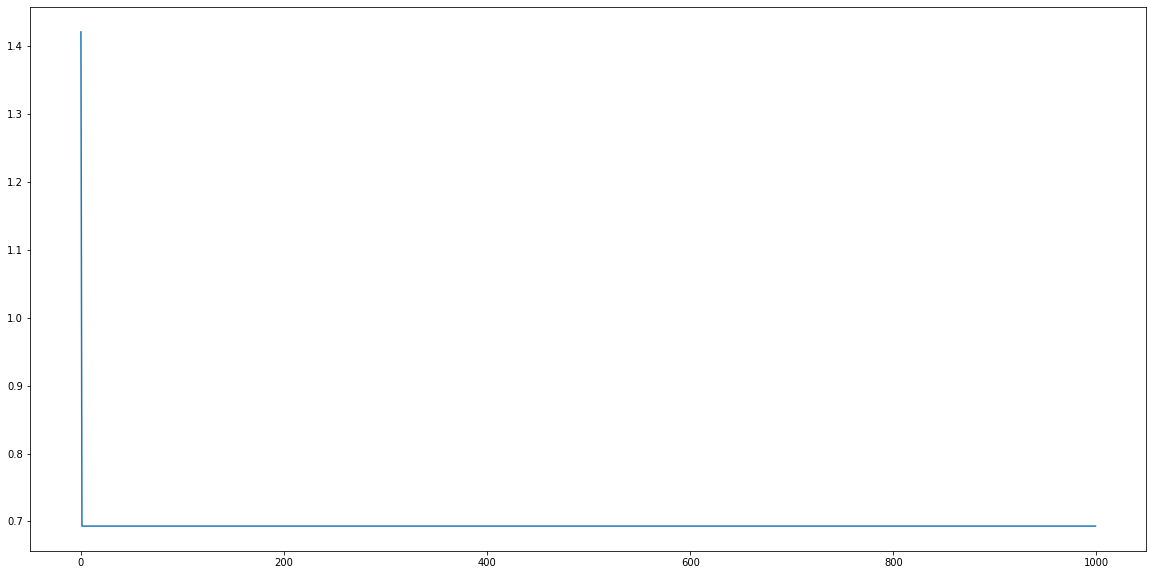

In [56]:
# convert all to negative values
temp_x = x - x.max() - 10

# Network Architecture
relu_model = nn.Sequential(
    nn.Linear(2,2),
    nn.ReLU()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(relu_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = relu_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [27]:
output[:5]

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<SliceBackward>)

As seen from the example above, due to the extreme negative x values, the Network is unable to learn from the start and thus got 'trapped' or resulted in the neurons 'dying'. We can identify this happening when the Network starts to output 0 or the loss function stops learning.

However, this is seldom the case as we wouldn't often see applications with extremely negative inputs. Even so, applying some form of normalisation would resolve the situation.

## Leaky ReLU - In case you still need to tackle this

In [51]:
x_leakyR = nn.LeakyReLU(0.01)
x_leakyR = x_leakyR(x)

In [52]:
print(x_leakyR.data.min())
print(x_leakyR.data.max())

tensor(-0.0413)
tensor(2.7238)


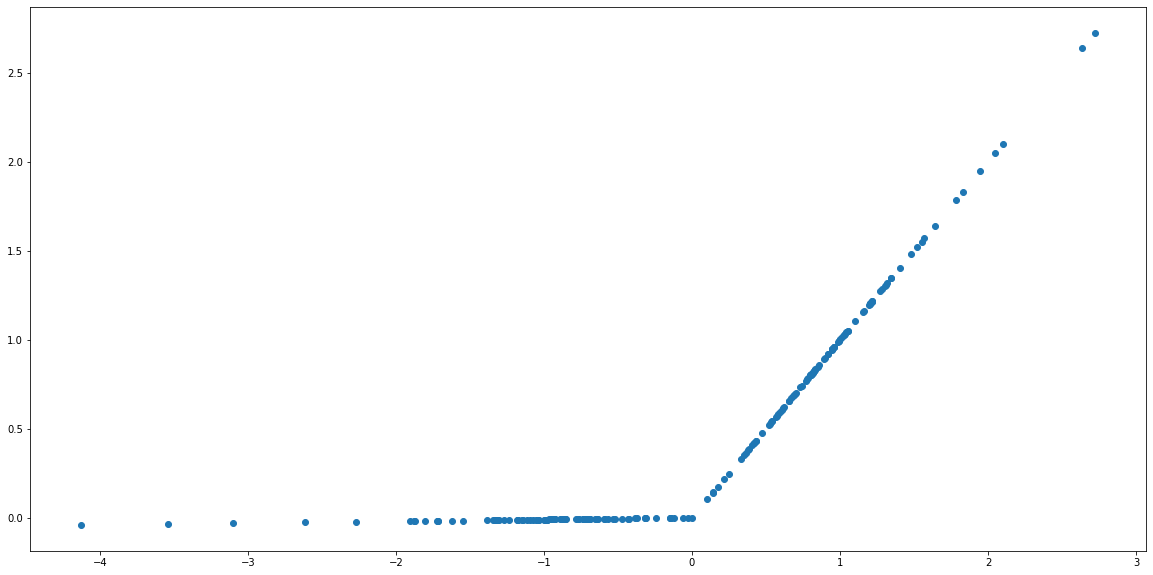

In [53]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_leakyR.view(200))

Although slightly unclear, we now have a slight slope of 0.01 for the negative values.

How does this fix the dying relu?

1/1000 --- Loss: 2.2518653869628906
11/1000 --- Loss: 0.6955158710479736
21/1000 --- Loss: 0.6952945590019226
31/1000 --- Loss: 0.6950801014900208
41/1000 --- Loss: 0.6948719024658203
51/1000 --- Loss: 0.6946702599525452
61/1000 --- Loss: 0.6944743394851685
71/1000 --- Loss: 0.6942844986915588
81/1000 --- Loss: 0.6941003203392029
91/1000 --- Loss: 0.6939214468002319
101/1000 --- Loss: 0.6937482953071594
111/1000 --- Loss: 0.6935797929763794
121/1000 --- Loss: 0.6934165358543396
131/1000 --- Loss: 0.6932584643363953
141/1000 --- Loss: 0.6931045055389404
151/1000 --- Loss: 0.6929553747177124
161/1000 --- Loss: 0.6928104162216187
171/1000 --- Loss: 0.6926702260971069
181/1000 --- Loss: 0.692533552646637
191/1000 --- Loss: 0.6924010515213013
201/1000 --- Loss: 0.6922727823257446
211/1000 --- Loss: 0.6921476125717163
221/1000 --- Loss: 0.6920263171195984
231/1000 --- Loss: 0.691908597946167
241/1000 --- Loss: 0.6917941570281982
251/1000 --- Loss: 0.6916829943656921
261/1000 --- Loss: 0.6915

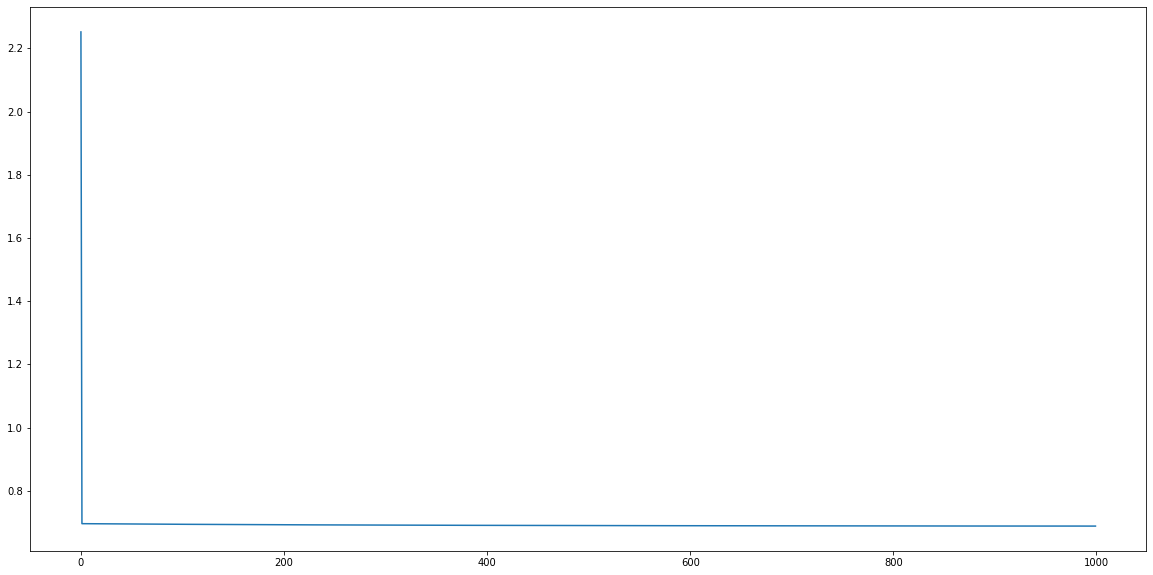

In [63]:
# convert all to negative values
temp_x = x - x.max() - 10

# Network Architecture
leaky_model = nn.Sequential(
    nn.Linear(2,2),
    nn.LeakyReLU()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(leaky_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = leaky_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [61]:
output[:5]

tensor([[-0.0329, -0.1261],
        [-0.0061, -0.1119],
        [-0.0211, -0.1162],
        [-0.0098, -0.1098],
        [-0.0428, -0.1342]], grad_fn=<SliceBackward>)

Although slowly, we see that the loss function continues to improve over the epochs. However, this is very insignificant. Overall, we should look for different techniques when dealing with a highly negative dataset.